Qué número de valores de energía desea aproximar?4


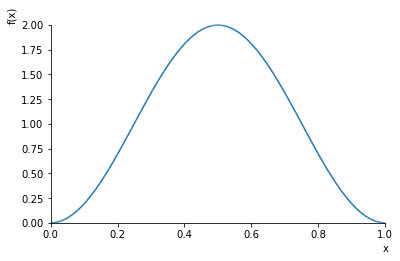

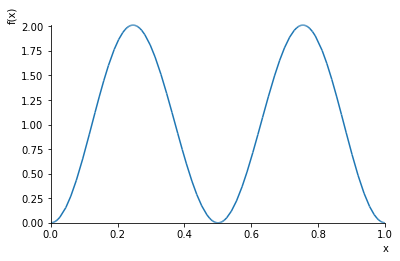

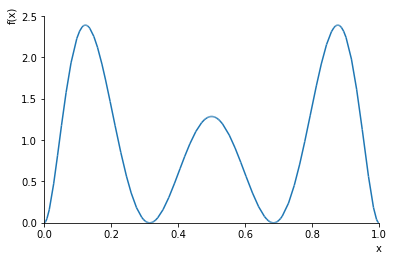

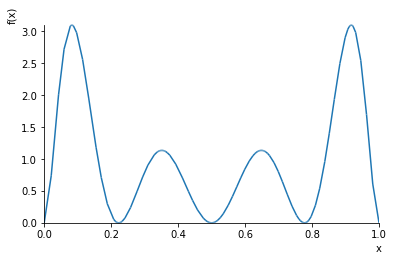

Wall time: 24.9 s


In [31]:
%%time
import time
for _ in range(1000):
    time.sleep(0.01)# sleep for 0.01 seconds

from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')
from sympy.plotting import plot

n = int(input('Qué número de valores de energía desea aproximar?'))

l, m, hbar, k = symbols('l m hbar k', real = True, constant = True)
var('x,W')

H = ones(n,n)
S = ones(n,n)
U = ones(n,n)
CC = ones(n,n)

#F = [sympify(input('Ingrese la función {0}: '.format(i+1))) for i in range(n)]
F = [x*(l - x),(x**2)*((l - x)**2),x*(l - x)*((l/2)-x),(x**2)*((l - x)**2)*((l/2)-x)]

fi = zeros(n)
c = ones(n,n)
for i in range(n):
    for j in range(n):
        c[i,j] = sympify('c%d%d' %(j+1,i+1))
        fi[j] = sympify('phi%d' %(j+1))

for j in range(1,n+1):                                                             #loop para llenar la matriz H
    for i in range(1,n+1):
        I = ((-hbar**2)/(2*m))
        integrando = I*(F[j-1])*diff(F[i-1], x, 2)
        A = integrate(integrando, (x, 0, l))
        integrandos = (F[j-1])*(F[i-1])
        B = integrate(integrandos, (x, 0, l))
        H[j-1,i-1] *= A
        S[j-1,i-1] *= B
        U[j-1,i-1] *= (H[j-1,i-1] -W*S[j-1,i-1])
        
E = U.det()
EE = solve(E,W)

a = 1/EE[0]

#truco para ordenar los W
for i in range(n):
    EE[i] = EE[i]*a
EE.sort()
for j in range(n):
    EE[j] = EE[j]*(1/a)

cc = Matrix(c)

for j in range(n):
    for i in range(n):
        C = U*cc.col(j)
        CC[i,j] *= C[i].subs(W, EE[j])
G = []        
for i in range(n):
    D = solve(CC.col(i),cc)  
    G.append(list(D.items()))
    
G = Matrix(G)
J = []

for i in range(len(G)):
    if G[i][1] != 0:
        J.append(factor(G[i]))

ceros = []
param = []

for i in range(len(G)):
    if G[i][1] != 0:
        param.append(G[i][0])
    elif G[i][1] == 0:
        ceros.append(G[i][0])        
kas = [x for x in cc if x not in (ceros+param)]

finale = ones(n,n)

for j in range(n):
    for i in range(n):
        if sympify('c'+str(i+1)+str(j+1)) not in (ceros+param):
            finale[i,j] *= k
        elif sympify('c'+str(i+1)+str(j+1)) not in (kas+ceros):
            finale[i,j] *= J[i][1].subs(sympify('c'+str(i+1)+str(j+1+1)),k)
        else:
            finale[i,j] *= 0

Psi = factor(finale*Matrix(F))
integrand = []
Psis = []
for i in range(n):
    integrand.append(Psi[i]**2)
    Psis.append(integrate(integrand[i], (x, 0, l)))
    
normaliz = []
for i in range(n):
    normaliz.append(factor(Psis[i])*(1/k**2)-(1/k**2))
KKK = []
Figaro = []
for i in range(n):
    KKK.append(solve(normaliz[i],k**2))
    Figaro.append(Psi[i]**2)   
    Figaro[i] = Figaro[i].subs(k**2,KKK[i][0]) 

for i in range(n):
    plot(Figaro[i].subs(l, 1), (x, 0,1))
